# Reading data

In [29]:
from pandas import read_table
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

address = "stockvalues.csv"
# http://mldata.org/repository/data/viewslug/stockvalues/

frame = read_table(address, encoding='latin-1', sep=',', skipinitialspace=True, index_col=None, header=None)

# last column is the target column
frame = frame[[61, 62, 63, 32]] 

# Data processing

In [30]:
# Normalization
arr = np.array(frame, dtype=np.float)
arr = MinMaxScaler().fit_transform(arr)

# Data split
X, y = arr[:, :-1], arr[:, -1]
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.5)
X_test, y_test = X, y

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Learning and testing

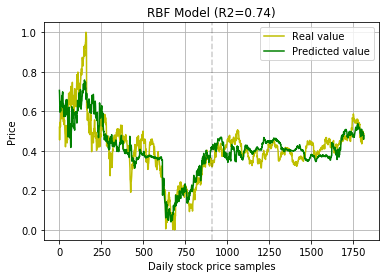

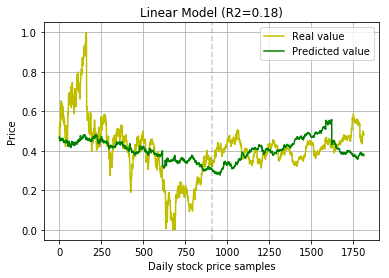

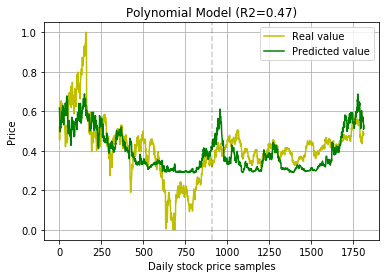

In [32]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test) # Coefficient of determination
r_2 = svr.score(X_test, y_test)
plottingResults('Linear Model (R2={:.2f})'.format(r_2), y_test, y_pred)

svr = SVR(kernel='poly', degree=2)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test) # Coefficient of determination
r_2 = svr.score(X_test, y_test)
plottingResults('Polynomial Model (R2={:.2f})'.format(r_2), y_test, y_pred)

svr = SVR(kernel='rbf', gamma=0.1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test) # Coefficient of determination
r_2 = svr.score(X_test, y_test)
plottingResults('Radial Basis Model (R2={:.2f})'.format(r_2), y_test, y_pred)

# Plotting

In [24]:
def plottingResults(title, y, y_pred):
    plt.ylabel('Price')
    plt.xlabel('Daily stock price samples')
    plt.title(title)
    plt.plot(y, 'y', label='Real value')
    plt.plot(y_pred, 'g', label='Predicted value')
    plt.grid()
    plt.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)
    plt.legend()
    
    plt.show()
    plt.close()